<a href="https://colab.research.google.com/github/Amzilynn/Breast-Cancer-Reccomendation-System-/blob/main/Copie_de_Breast_Cancer_Reccomendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coimbra Dataset

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
import os


file_path  = "/content/drive/MyDrive/Datasets/Coimbra_breast_cancer_dataset.csv"

# Check if the file exists before trying to read it
if os.path.exists(file_path):
    try:
        # Try reading with utf-8 first (default)
        df2 = pd.read_csv(file_path)
        print(f"Successfully loaded CSV with utf-8: {df2.shape[0]} rows, {df2.shape[1]} columns")
    except UnicodeDecodeError:
        try:
            # If utf-8 fails, try latin-1
            df2 = pd.read_csv(file_path, encoding='latin-1')
            print(f"Successfully loaded CSV with latin-1: {df2.shape[0]} rows, {df2.shape[1]} columns")
        except Exception as e:
            print(f"Error loading CSV with latin-1: {e}")
            df2 = None # Ensure df2 is None if loading fails
    except Exception as e:
        print(f"An unexpected error occurred while loading CSV: {e}")
        df2 = None # Ensure df2 is None if loading fails
else:
    print(f"Error: The file was not found at {file_path}")
    df2 = None # Ensure df2 is None if file is not found

if df2 is not None:
    # Display the first few rows if the dataframe was loaded successfully
    display(df2.head())

Successfully loaded CSV with utf-8: 116 rows, 10 columns


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [145]:
df2.describe()


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [146]:
info_df = pd.DataFrame({
        'Column': df2.columns,
        'Non_Null_Count': df2.count(),
        'Null_Count': df2.isnull().sum(),
        'Missing_%': (df2.isnull().sum() / len(df2) * 100).round(2)
    })
print(info_df.to_string(index=False))


        Column  Non_Null_Count  Null_Count  Missing_%
           Age             116           0        0.0
           BMI             116           0        0.0
       Glucose             116           0        0.0
       Insulin             116           0        0.0
          HOMA             116           0        0.0
        Leptin             116           0        0.0
   Adiponectin             116           0        0.0
      Resistin             116           0        0.0
         MCP.1             116           0        0.0
Classification             116           0        0.0


In [147]:
duplicate_count = df2.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage: {(duplicate_count/len(df2)*100):.2f}%")
print()


Number of duplicate rows: 0



## Data Visualization

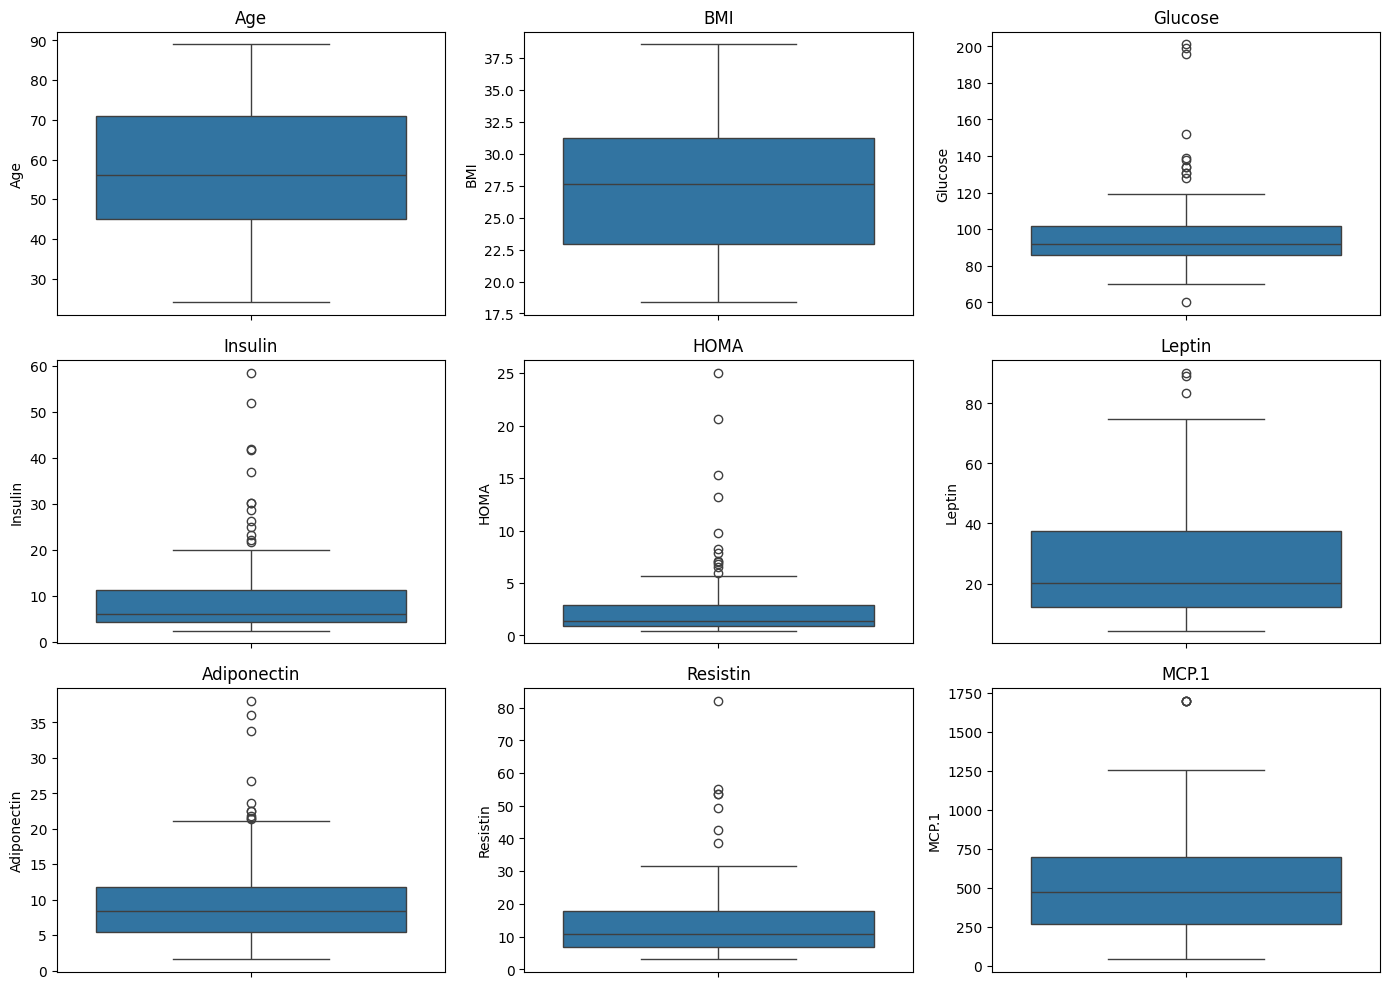

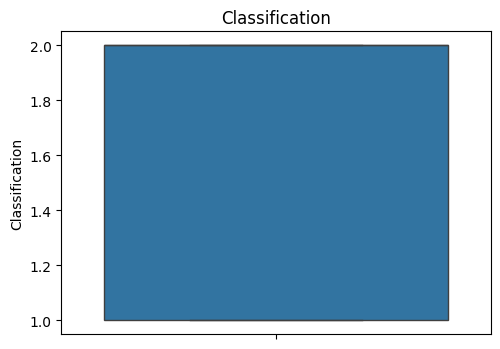

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns

numerical_cols = [col for col in numerical_cols if df2[col].dropna().shape[0] > 0]
cols_per_fig = 9  # number of boxplots per figure

for start in range(0, len(numerical_cols), cols_per_fig):
    end = start + cols_per_fig
    batch = numerical_cols[start:end]

    plt.figure(figsize=(14, 10))
    for i, col in enumerate(batch, 1):
        plt.subplot(3, 3, i)  # 2 rows, 3 columns
        sns.boxplot(y=df2[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()

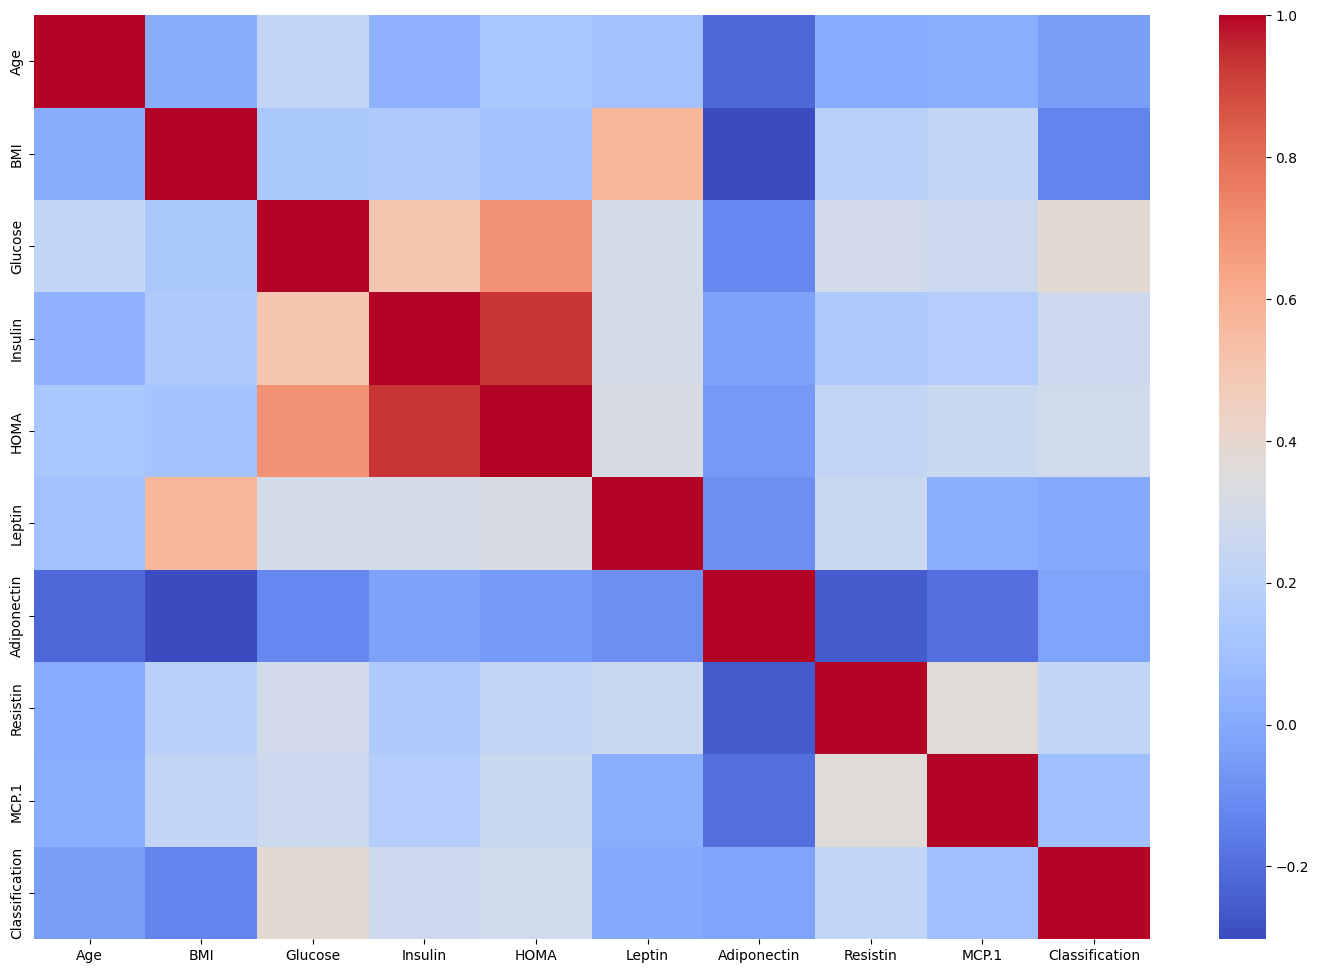

In [149]:
# matrice de correllation les variables entre eux
df_features = df2.drop(columns=['Classification'])
plt.figure(figsize=(18, 12))
sns.heatmap(df2.corr(), annot=False, cmap='coolwarm')
plt.show()


In [150]:
# matrice de correllation les variables avec la target
# creation de diagnosis numerique

df2.corr()['Classification'].sort_values(ascending=False)



,Classification
Classification,1.000000
Glucose,0.384315
HOMA,0.284012
Insulin,0.276804
Resistin,0.227310
MCP.1,0.091381
Leptin,-0.001078
Adiponectin,-0.019490
Age,-0.043555
BMI,-0.132586


**PCA**

In [151]:
# standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Sélectionner uniquement les variables numériques
X2 = df2.select_dtypes(include=[np.number])

# --- 2. Standardisation
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

# --- 3. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled2)

# Variance expliquée
print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)


Variance expliquée par PC1 et PC2 : [0.3169621  0.16237842]


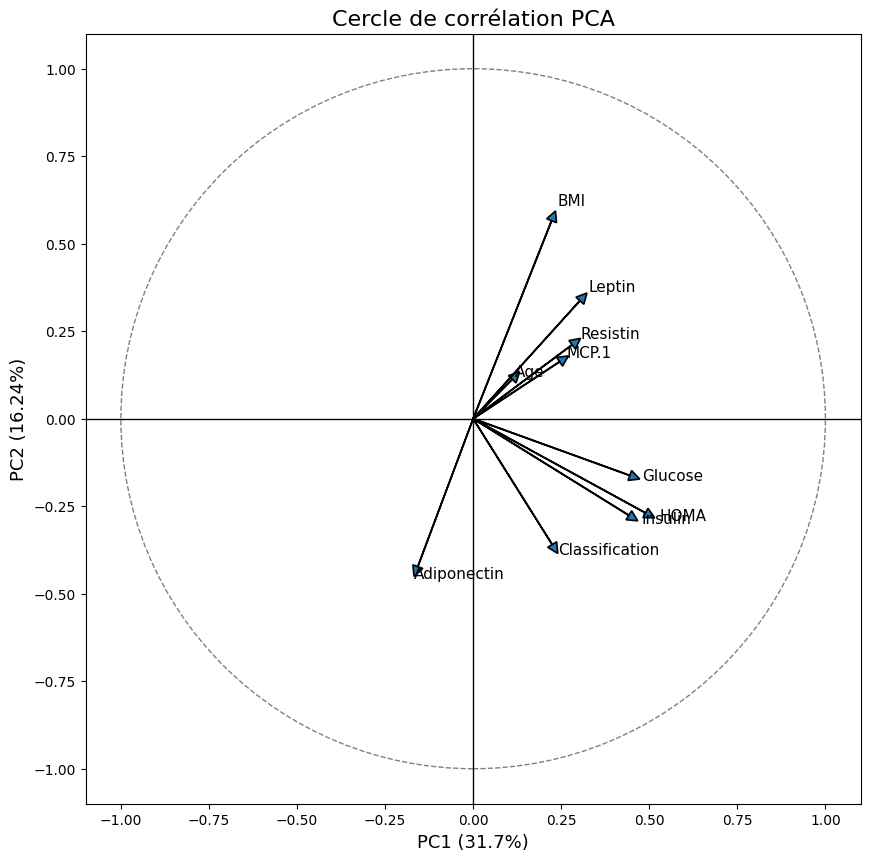

In [152]:
# ---  cercle de corrélation ---
def plot_correlation_circle(pca, features, dim1=1, dim2=2):
    pcs = pca.components_
    pc1 = pcs[dim1-1]
    pc2 = pcs[dim2-1]

    fig, ax = plt.subplots(figsize=(10,10))

    # Cercle
    circle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
    ax.add_artist(circle)

    # Axes
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)

    # Variables
    for i, feature in enumerate(features):
        x = pc1[i]
        y = pc2[i]
        ax.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, linewidth=1.2)
        ax.text(x*1.08, y*1.08, feature, fontsize=11)

    ax.set_xlabel(f"PC{dim1} ({round(pca.explained_variance_ratio_[dim1-1]*100,2)}%)", fontsize=13)
    ax.set_ylabel(f"PC{dim2} ({round(pca.explained_variance_ratio_[dim2-1]*100,2)}%)", fontsize=13)
    ax.set_title("Cercle de corrélation PCA", fontsize=16)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    plt.grid(False)
    plt.show()

# --- Appel de la fonction ---
plot_correlation_circle(pca, X2.columns)


# Data Preparation

In [153]:
features2 = [col for col in df2.columns if col != "Classification"]
X2= df2[features2].values
y2 = df2["Classification"].values


In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)


In [155]:
# 1) Garder seulement les malades
df_cancer = df2[df2["Classification"] == 2].copy() #df contenant les malades seulement
df_non_cancer = df2[df2["Classification"] == 1].copy() #df contenant les non malades seulement
print(df_cancer.shape)  # nombre de patientes malades

(64, 10)


# Modeling

## **Cluster and classify diagnosis patterns**

**Modéle 1 (K-means)**

In [156]:


# 2) Features = toutes les colonnes explicatives SANS Classification
features = [col for col in df_cancer.columns if col != "Classification"]
X_cancer = df_cancer[features].values


In [157]:
from sklearn.preprocessing import StandardScaler

scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)


K=2: silhouette=0.231
K=3: silhouette=0.219
K=4: silhouette=0.209


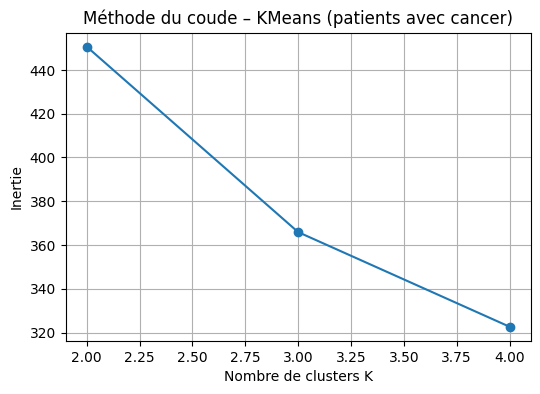

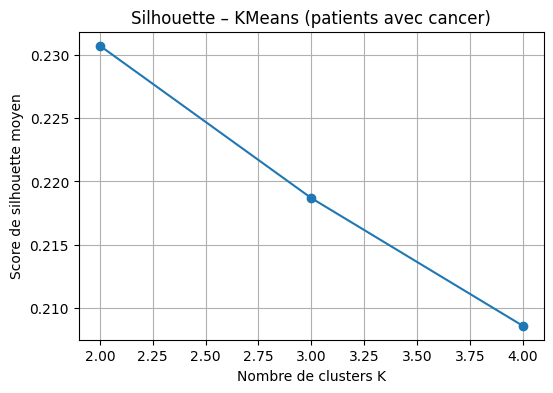

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
K_range = range(2, 5)  # K = 2, 3, 4 pour les sous-types de cancer

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cancer_scaled)
    inertias.append(km.inertia_)
    labels = km.labels_
    sil = silhouette_score(X_cancer_scaled, labels)
    sil_scores.append(sil)
    print(f"K={k}: silhouette={sil:.3f}")

# Coude
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie")
plt.title("Méthode du coude – KMeans (patients avec cancer)")
plt.grid(True)
plt.show()

# Silhouette
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Score de silhouette moyen")
plt.title("Silhouette – KMeans (patients avec cancer)")
plt.grid(True)
plt.show()


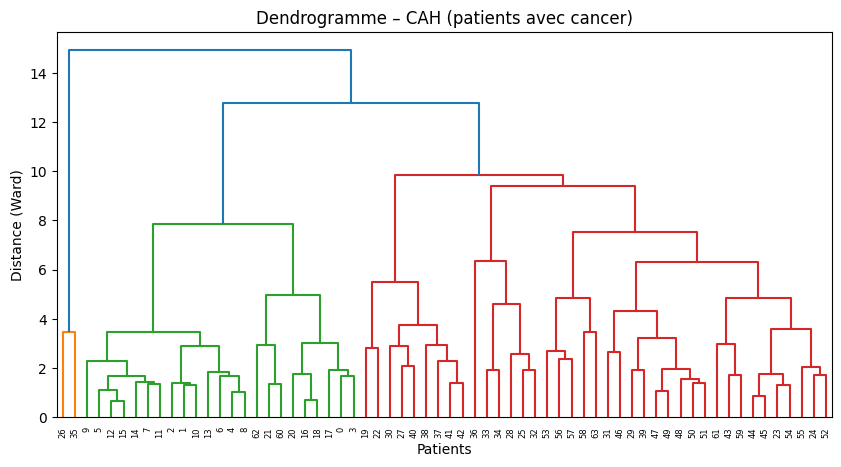

In [159]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Lien hiérarchique avec critère de Ward (adapté aux données continues standardisées)
Z = linkage(X_cancer_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode=None, color_threshold=None)
plt.title("Dendrogramme – CAH (patients avec cancer)")
plt.xlabel("Patients")
plt.ylabel("Distance (Ward)")
plt.show()


**Pour k=2**

In [160]:
best_k = 2

kmeans_cancer = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_cancer.fit(X_cancer_scaled)

cluster_labels_cancer = kmeans_cancer.labels_

# Ajouter les labels de cluster dans df_cancer
df_cancer["cluster_kmeans_cancer"] = cluster_labels_cancer

# Si tu veux réintégrer dans le df complet (NaN pour les non malades)
df2["cluster_kmeans_cancer"] = np.nan
df2.loc[df_cancer.index, "cluster_kmeans_cancer"] = cluster_labels_cancer


In [161]:
# Moyenne des variables par cluster
cluster_profile = df_cancer.groupby("cluster_kmeans_cancer")[features2].mean()
print(cluster_profile)

# Nombre de patientes par cluster
print(df_cancer["cluster_kmeans_cancer"].value_counts())


                             Age        BMI  Glucose    Insulin      HOMA  \
cluster_kmeans_cancer                                                       
0                      52.975000  24.661490   94.875   7.094225  1.668641   
1                      62.833333  30.856824  123.375  21.544875  6.881176   

                          Leptin  Adiponectin   Resistin      MCP.1  
cluster_kmeans_cancer                                                
0                      16.935700    10.423703  16.408309  494.80115  
1                      42.697867     9.456941  18.662891  676.70875  
cluster_kmeans_cancer
0    40
1    24
Name: count, dtype: int64


In [162]:
from sklearn.decomposition import PCA

# Projection PCA 2D pour les patientes avec cancer
pca_vis = PCA(n_components=2)
X_cancer_pca = pca_vis.fit_transform(X_cancer_scaled)

# IMPORTANT : ajouter les colonnes dans df_cancer
df_cancer = df_cancer.copy()
df_cancer["PC1"] = X_cancer_pca[:, 0]
df_cancer["PC2"] = X_cancer_pca[:, 1]


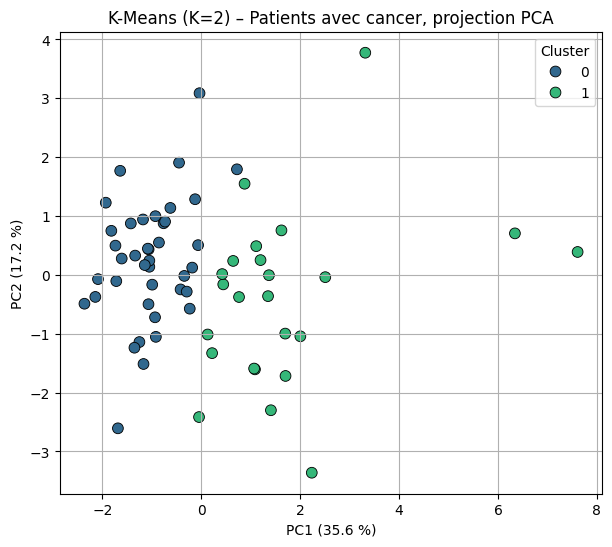

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1", y="PC2",
    hue="cluster_kmeans_cancer",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_vis.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_vis.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("K-Means (K=2) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


 **Cluster Interpretation and Naming**

### 🔹 Cluster 0
- Characterized by **younger age**, **lower BMI**, and **lower glucose, insulin, and HOMA values** compared to Cluster 1.  
- This indicates a **less disrupted metabolic profile**.
- **Leptin, resistin, and MCP-1 levels** are also lower, consistent with **moderate obesity and lower inflammation**.

**Proposed name:**  
- *Cancers with Moderate Metabolic Risk*  
- *Moderate Metabolic Subtype*

---

### 🔹 Cluster 1
- Characterized by **higher average age** and **significantly higher BMI (~31)**.  
- Displays **very high glucose (~123)**, along with **insulin and HOMA values increased by 3–4×**, indicating **strong insulin resistance** and features of **metabolic syndrome**.
- **Leptin and MCP-1 levels** are markedly elevated, with higher resistin, reflecting **severe obesity and increased systemic inflammation**.

**Proposed name:**  
- *Cancers with High Metabolic Risk (Obesity and Insulin Resistance)*  
- *Severe Metabolic Subtype*


**Pour k=3**

In [164]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np # Import numpy for NaN values

# On part de df_cancer, features, X_cancer_scaled déjà définis
best_k = 3

kmeans_cancer_3 = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_cancer_3.fit(X_cancer_scaled)

cluster_labels_cancer_3 = kmeans_cancer_3.labels_
df_cancer["cluster_kmeans_cancer_3"] = cluster_labels_cancer_3

# Add to df2 as well for consistency and later use in df_complete
df2["cluster_kmeans_cancer_3"] = np.nan # Initialize with NaN for all rows
# To address the FutureWarning, avoid chained assignment or inplace modification on a copy.
# Instead, assign the result of fillna directly to the column.
df2.loc[df_cancer.index, "cluster_kmeans_cancer_3"] = cluster_labels_cancer_3 # Assign for cancer patients
df2["cluster_kmeans_cancer_3"] = df2["cluster_kmeans_cancer_3"].fillna(3) # Fill non-cancer patients with 3, directly assigning
df2["cluster_kmeans_cancer_3"] = df2["cluster_kmeans_cancer_3"].astype(int) # Convert to integer

# Qualité interne
sil_3 = silhouette_score(X_cancer_scaled, cluster_labels_cancer_3)
print("Silhouette K=3 (cancers) :", sil_3)


Silhouette K=3 (cancers) : 0.21868320395349716


In [165]:
# Nombre de patientes par cluster
print(df_cancer["cluster_kmeans_cancer_3"].value_counts())

# Moyenne des variables par cluster
cluster_profile_3 = df_cancer.groupby("cluster_kmeans_cancer_3")[features].mean()
print(cluster_profile_3)


cluster_kmeans_cancer_3
0    39
1    22
2     3
Name: count, dtype: int64
                               Age        BMI     Glucose    Insulin  \
cluster_kmeans_cancer_3                                                
0                        53.076923  24.530303   95.512821   7.060846   
1                        60.818182  31.124368  110.681818  19.085727   
2                        73.000000  28.535148  198.666667  35.195667   

                              HOMA     Leptin  Adiponectin   Resistin  \
cluster_kmeans_cancer_3                                                 
0                         1.674255  16.053572    10.415805  16.296522   
1                         5.224861  42.701214    10.015245  15.248236   
2                        17.216999  45.553600     5.787642  44.405400   

                               MCP.1  
cluster_kmeans_cancer_3               
0                         492.040000  
1                         562.193500  
2                        1491.746333  


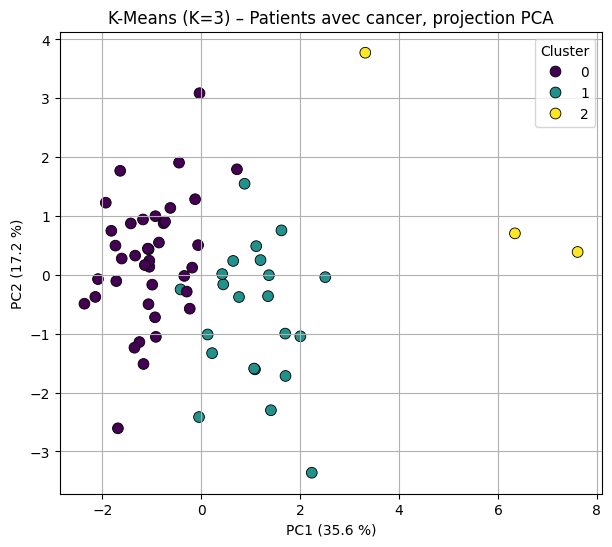

In [166]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca_vis_3 = PCA(n_components=2)
X_cancer_pca_3 = pca_vis_3.fit_transform(X_cancer_scaled)

df_cancer["PC1_3"] = X_cancer_pca_3[:, 0]
df_cancer["PC2_3"] = X_cancer_pca_3[:, 1]

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_3", y="PC2_3",
    hue="cluster_kmeans_cancer_3",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_vis_3.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_vis_3.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("K-Means (K=3) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


 **PCA-Based Cluster Interpretation**

### 🔹 Cluster 0 (Purple)
- Mostly located on the **left side of the PCA plot**, with **lower PC1 values**.
- Represents cancers with a **relatively less disrupted metabolic profile**, closer to normal levels of **glucose, insulin, and HOMA**.

**Interpretation:**  
- *Moderate Metabolic Cancers*  
- The **least metabolically altered** group among the patients.

---

### 🔹 Cluster 1 (Green)
- Occupies the **central to right region** of the PCA plot, with **higher PC1 values than Cluster 0**.
- Indicates **intermediate metabolic abnormalities**, including elevated **glucose and HOMA**, but **less extreme than Cluster 2**.

**Interpretation:**  
- *Intermediate Metabolic-Risk Cancers*  
- Patients show **clear metabolic disruption**, but not severe.

---

### 🔹 Cluster 2 (Yellow)
- Groups a **small number of patients** located **far to the right on PC1**.
- Corresponds to the **most extreme metabolic profiles**, likely involving **severe hyperglycemia, insulin resistance**, and possibly **high BMI and leptin levels**.

**Interpretation:**  
- *Severe Metabolic Cancers (Extreme Profiles)*  
- Represents patients with **very marked metabolic dysregulation** at the extreme end of the metabolic axis.


##  reccomendation System

In [167]:
df_complete = df2.copy()

# Drop the old K=2 cluster column
if "cluster_kmeans_cancer" in df_complete.columns:
    df_complete.drop(columns=["cluster_kmeans_cancer"], inplace=True)

# Rename the K=3 cluster column to the final cluster column
df_complete = df_complete.rename(columns={
    "cluster_kmeans_cancer_3": "cluster_final"
})

# The 'Classification' column indicates disease status, not a feature for clustering or Z-score calculation based on healthy individuals.
if "Classification" in df_complete.columns:
    df_complete.drop(columns=["Classification"], inplace=True)


In [168]:
df_complete.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster_final
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,3
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,3
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,3
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,3
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,3


In [169]:
features = [col for col in df_complete.columns if col != "cluster_final"]
df_cancer_rec = df_complete[df_complete["cluster_final"].isin([0, 1, 2])].copy()
df_non_cancer_rec = df_complete[df_complete["cluster_final"] == 3].copy()

In [170]:
baseline_stats = df_non_cancer_rec[features].describe().T
baseline_stats = baseline_stats[['mean', 'std', 'min', 'max']]
baseline_stats['5th_percentile'] =  df_non_cancer_rec[features].quantile(0.05)
baseline_stats['95th_percentile'] = df_non_cancer_rec[features].quantile(0.95)

In [171]:
print("=== HEALTHY REFERENCE RANGES ===")
print(baseline_stats)

=== HEALTHY REFERENCE RANGES ===
                   mean         std        min          max  5th_percentile  \
Age           58.076923   18.957999  24.000000    89.000000       28.550000   
BMI           28.317336    5.427465  18.670000    38.578759       20.953111   
Glucose       88.230769   10.191529  60.000000   118.000000       75.550000   
Insulin        6.933769    4.859793   2.707000    26.211000        3.176050   
HOMA           1.552398    1.218256   0.467409     7.111918        0.602499   
Leptin        26.637933   19.334699   4.311000    83.482100        6.669520   
Adiponectin   10.328205    7.631281   2.194280    38.040000        3.494112   
Resistin      11.614813   11.447053   3.291750    82.100000        4.142948   
MCP.1        499.730692  292.242157  45.843000  1256.083000      152.345750   

             95th_percentile  
Age                83.900000  
BMI                36.637525  
Glucose           104.350000  
Insulin            16.677800  
HOMA                3

**Interpretation of Descriptive Statistics (Healthy Reference Group)**

- **Mean** → Represents the **typical healthy value** for each variable.
- **Standard Deviation (Std)** → Reflects the **natural variability** within the healthy population.
- **Minimum / Maximum (Min / Max)** → Indicate the **extreme observed values** among healthy individuals.
- **5th Percentile** → Defines the **lower boundary** of values still considered within the normal range.
- **95th Percentile** → Defines the **upper boundary** of values still considered within the normal range.

**Healthy Population Profile
The reference dataset corresponds to healthy women with:**



- An average age of approximately **58 years**.
- A **slightly overweight BMI (~28)**.
- A **normal fasting glucose level (~88 mg/dL)**.
- **Normal insulin sensitivity**, with average insulin levels around **6.9 µU/mL**.

This healthy profile serves as a **baseline** for comparison with cancer patient clusters, allowing identification of **metabolic deviations** associated with disease severity.


## Analyze the existing data

**Using Z-score we are going to calculate how many standard deviations each patient deviates from healthy mean**

In [172]:
def calculate_z_scores(df, baseline):
    z_scores = pd.DataFrame(index=df.index, columns=features)

    for feature in features:
        mean = baseline.loc[feature, 'mean']
        std = baseline.loc[feature, 'std']
        z_scores[feature] = (df[feature] - mean) / std

    return z_scores

# Apply to all patients
z_scores_all = calculate_z_scores(df_complete, baseline_stats)

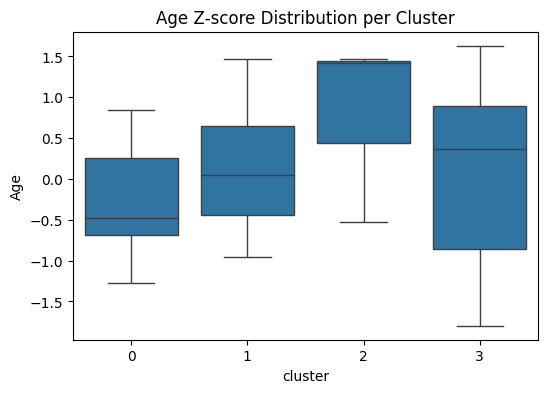

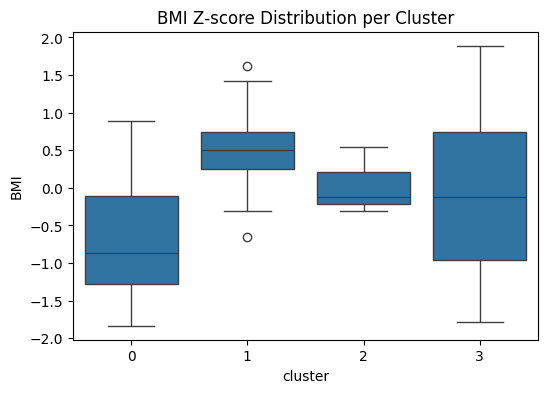

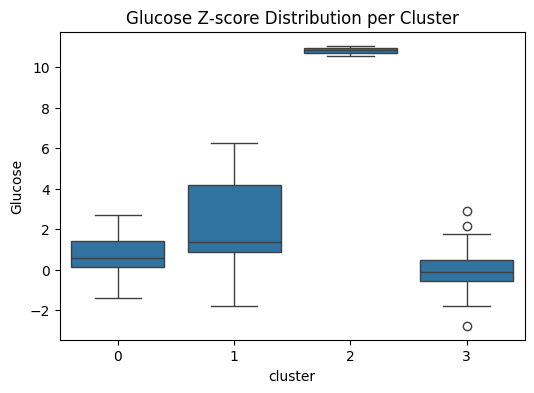

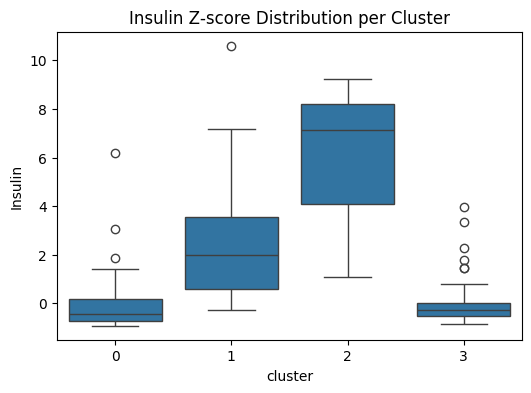

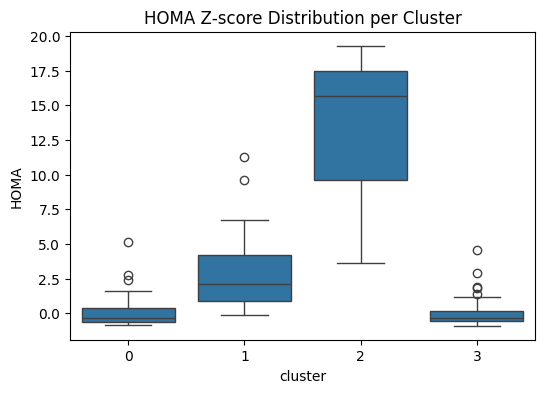

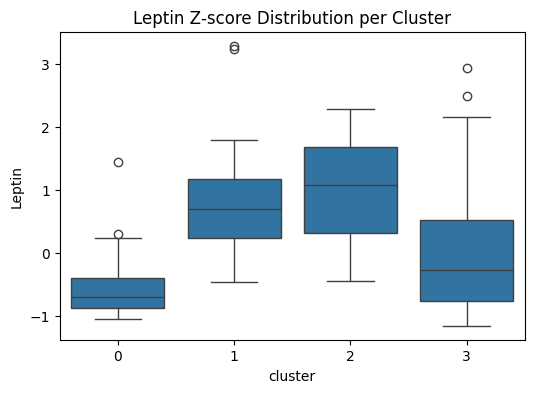

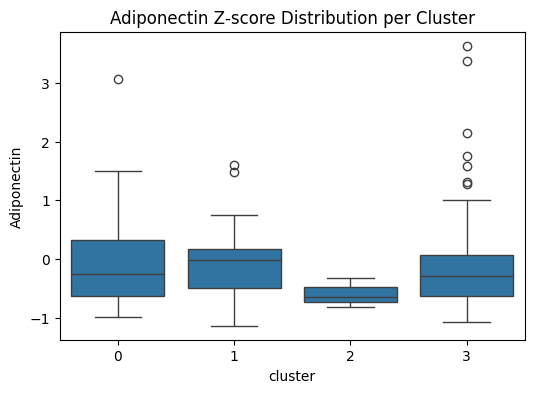

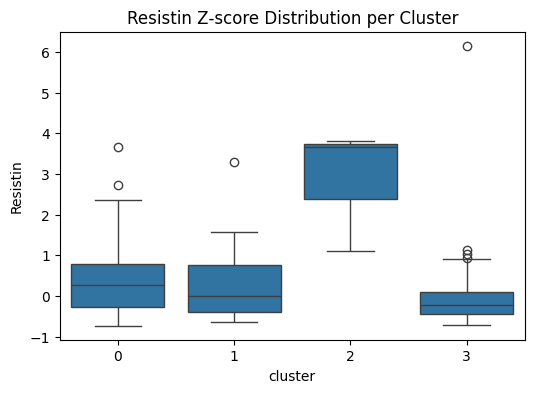

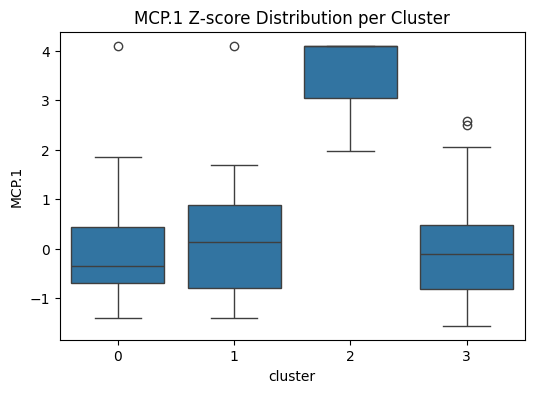

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Put all the 9 biomarkers in a list
features = ["Age","BMI","Glucose","Insulin","HOMA","Leptin",
            "Adiponectin","Resistin","MCP.1"]

df_z_with_cluster = z_scores_all.copy()
df_z_with_cluster["cluster"] = df_complete["cluster_final"]

# One boxplot per feature
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_z_with_cluster, x="cluster", y=feature)
    plt.title(f"{feature} Z‑score Distribution per Cluster")
    plt.show()


**Interpretation of Z-Scores**

Z-scores indicate how far a patient’s value deviates from the **dataset average**:

- **Z = 0** → Average value  
- **Z > 0** → Higher than average  
- **Z < 0** → Lower than average  

**Variable-Specific Interpretation**

**Age**  
- Positive Z-scores indicate **older patients**.  
- Negative Z-scores indicate **younger patients**.

**BMI**  
- Higher Z-scores correspond to a **higher body mass index** relative to the average.

**Insulin & HOMA**  
- Higher Z-scores indicate **elevated insulin levels** and **greater insulin resistance**.

**Leptin & Resistin**  
- Higher Z-scores suggest **altered adipokine levels**, often associated with **metabolic imbalance**.

**Adiponectin**  
- Lower Z-scores indicate **reduced adiponectin levels**, commonly linked to **metabolic dysfunction**.

**MCP-1**  
- Higher Z-scores reflect **increased inflammatory activity**.


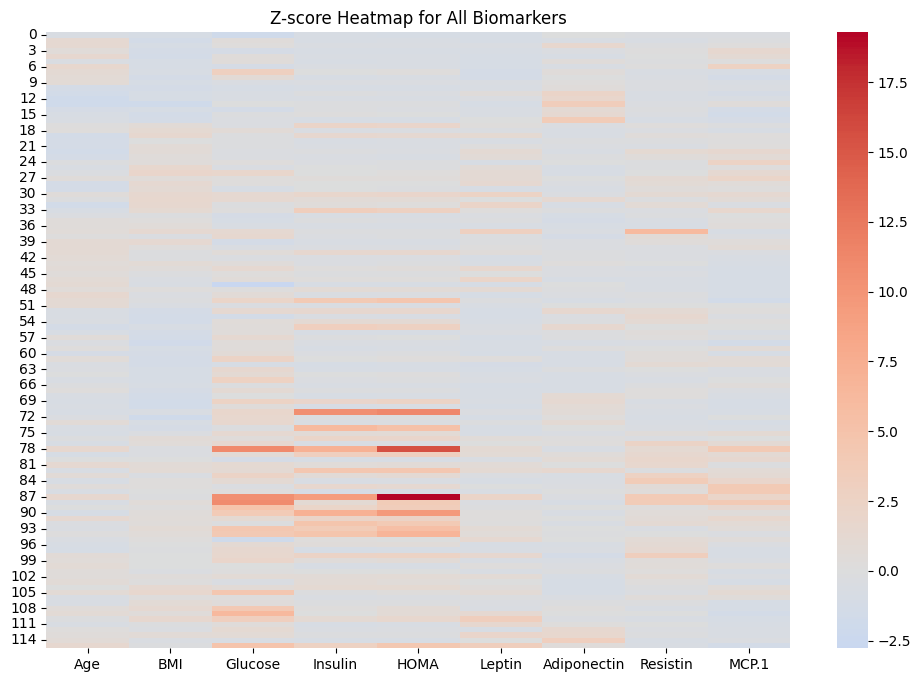

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(z_scores_all, cmap="coolwarm", center=0)
plt.title("Z-score Heatmap for All Biomarkers")
plt.show()


 **Heatmap Interpretation**

- **Most patients show light colors**, indicating **biomarker values close to those of healthy individuals**.
- **Z = 0** → The patient is close to the **healthy average**.
- **Blue** → Values **below the healthy average**.
- **Red** → Values **above the healthy average**.
- **Darker colors** → Indicate a **stronger deviation** from the healthy reference.

 **Heatmap Layout**
- **Rows** represent **individual patients**.
- **Columns** represent **biomarkers**.

 **Main Observation**
The **largest deviations** are observed in **glucose regulation**, characterized by:
- **Elevated insulin levels**
- **High glucose concentrations**
- **Increased HOMA index**

These patterns suggest **insulin resistance** as the dominant metabolic alteration in the cohort.


####Convert Z-score to interpretable severity label

In [175]:
def label_deviation(z_value):

    abs_z = abs(z_value)
    if abs_z < 1.0:
        return "Normal"
    elif abs_z < 1.5:
        return "Mild"
    elif abs_z < 2.5:
        return "Moderate"
    else:
        return "Severe"


deviation_labels = z_scores_all.applymap(label_deviation)
deviation_labels.columns = [f"{col}_deviation" for col in deviation_labels.columns]

/tmp/ipython-input-1552124486.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  deviation_labels = z_scores_all.applymap(label_deviation)


<Figure size 1400x600 with 0 Axes>

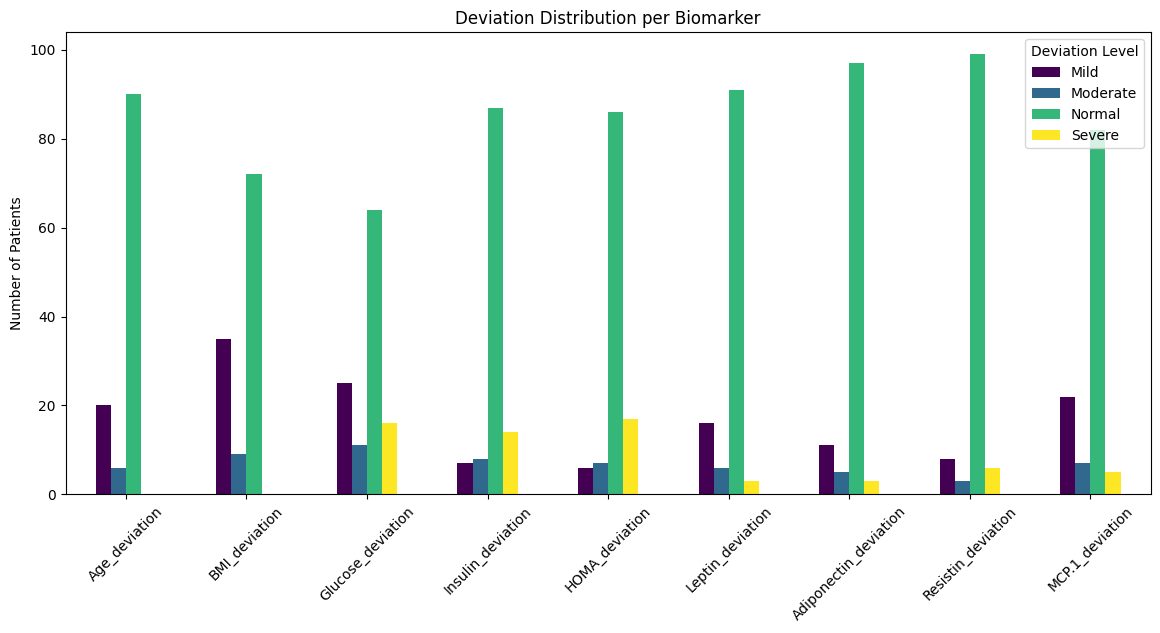

In [176]:
import pandas as pd

plt.figure(figsize=(14, 6))
deviation_counts = deviation_labels.apply(pd.Series.value_counts)

deviation_counts.T.plot(kind="bar", figsize=(14, 6), colormap="viridis")
plt.title("Deviation Distribution per Biomarker")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(title="Deviation Level")
plt.show()


create biological meaning dictioctioannry

In [177]:
biological_meaning = {
    "Age": {
        "full_name": "Age",
        "meaning": "Patient's age in years; cancer risk increases with age",
        "unit": "years",
        "clinical_significance": "Age >50 associated with higher breast cancer risk",
        "mechanism": "Accumulation of genetic mutations over time",
        "normal_range": None,
        "interpretation": {
            "High": "Increased cancer risk; prioritize screening",
            "Low": "Lower baseline risk but not protective"
        }
    },
    "BMI": {
        "full_name": "Body Mass Index",
        "meaning": "Body fat measure; obesity linked to estrogen production and inflammation",
        "unit": "kg/m²",
        "clinical_significance": "BMI >30 increases breast cancer risk by 30-50%",
        "mechanism": "Adipose tissue produces estrogen and inflammatory cytokines",
        "normal_range": (18.5, 24.9),
        "interpretation": {
            "High": "Weight reduction reduces cancer risk and improves metabolic health",
            "Low": "Rule out malnutrition or cachexia"
        }
    },
    "Glucose": {
        "full_name": "Fasting Blood Glucose",
        "meaning": "Primary energy source; elevated in insulin resistance and diabetes",
        "unit": "mg/dL",
        "clinical_significance": "Hyperglycemia fuels cancer cell growth (Warburg effect)",
        "mechanism": "Cancer cells preferentially use glucose for rapid proliferation",
        "normal_range": (70, 100),
        "interpretation": {
            "High": "Target glycemic control to reduce cancer progression risk",
            "Low": "Risk of hypoglycemia; adjust medications"
        }
    },
    "Insulin": {
        "full_name": "Fasting Insulin",
        "meaning": "Hormone that regulates glucose uptake; elevated in insulin resistance",
        "unit": "µU/mL",
        "clinical_significance": "Hyperinsulinemia activates IGF-1 pathway promoting cancer growth",
        "mechanism": "Insulin binds to IGF-1 receptors on cancer cells, stimulating proliferation",
        "normal_range": (2.6, 24.9),
        "interpretation": {
            "High": "Insulin-sensitizing drugs may reduce cancer risk and progression",
            "Low": "Check C-peptide; may indicate beta-cell dysfunction"
        }
    },
    "HOMA": {
        "full_name": "Homeostatic Model Assessment for Insulin Resistance",
        "meaning": "Calculated index of insulin resistance; HOMA = (Glucose × Insulin) / 405",
        "unit": "ratio",
        "clinical_significance": "HOMA >2.5 indicates insulin resistance, linked to poor cancer outcomes",
        "mechanism": "Insulin resistance creates pro-growth, pro-inflammatory environment",
        "normal_range": (0.5, 2.5),
        "interpretation": {
            "High": "Lifestyle modification and metformin can improve insulin sensitivity",
            "Low": "Normal insulin sensitivity; maintain healthy habits"
        }
    },
    "Leptin": {
        "full_name": "Leptin",
        "meaning": "Satiety hormone from adipose tissue; signals energy stores to brain",
        "unit": "ng/mL",
        "clinical_significance": "Elevated leptin in obesity promotes cancer via JAK/STAT pathway",
        "mechanism": "Leptin activates pro-survival and anti-apoptotic signals in cancer cells",
        "normal_range": (4, 25),
        "interpretation": {
            "High": "Leptin resistance in obesity; target visceral fat reduction",
            "Low": "May indicate low body fat or leptin deficiency"
        }
    },
    "Adiponectin": {
        "full_name": "Adiponectin",
        "meaning": "Anti-inflammatory adipokine; inversely related to body fat",
        "unit": "µg/mL",
        "clinical_significance": "Low adiponectin linked to cancer risk; protective molecule",
        "mechanism": "Activates AMPK pathway, inhibits mTOR (cancer suppression)",
        "normal_range": (5, 30),
        "interpretation": {
            "High": "Protective; associated with better metabolic health",
            "Low": "Metabolic dysfunction; increase through exercise and weight loss"
        }
    },
    "Resistin": {
        "full_name": "Resistin",
        "meaning": "Pro-inflammatory protein from adipose tissue; promotes insulin resistance",
        "unit": "ng/mL",
        "clinical_significance": "Elevated in inflammation and obesity; linked to cancer progression",
        "mechanism": "Induces NF-κB pathway activation, promoting inflammation and angiogenesis",
        "normal_range": (4, 12),
        "interpretation": {
            "High": "Anti-inflammatory interventions critical; monitor CRP",
            "Low": "Low inflammatory state; favorable"
        }
    },
    "MCP.1": {
        "full_name": "Monocyte Chemoattractant Protein-1",
        "meaning": "Chemokine that recruits immune cells to sites of inflammation",
        "unit": "pg/dL",
        "clinical_significance": "Elevated MCP-1 promotes tumor-associated macrophage infiltration",
        "mechanism": "Creates pro-tumor microenvironment via M2 macrophage polarization",
        "normal_range": (300, 600),
        "interpretation": {
            "High": "Chronic inflammation; consider anti-inflammatory diet and omega-3s",
            "Low": "Reduced inflammatory signaling; favorable"
        }
    }
}


print("✓ Biological meaning dictionary created for", len(biological_meaning), "features")



✓ Biological meaning dictionary created for 9 features


Add biological Interpretations to baseline stats

In [178]:
# Add new columns to baseline_stats
baseline_stats['biological_meaning'] = ""
baseline_stats['unit'] = ""
baseline_stats['clinical_significance'] = ""


for feature in features:
    if feature in biological_meaning:
        baseline_stats.loc[feature, 'biological_meaning'] = biological_meaning[feature]['meaning']
        baseline_stats.loc[feature, 'unit'] = biological_meaning[feature]['unit']
        baseline_stats.loc[feature, 'clinical_significance'] = biological_meaning[feature]['clinical_significance']


# Display enriched baseline
print("=" * 100)
print("ENRICHED BASELINE STATISTICS (Healthy Population Reference)")
print("=" * 100)
print(baseline_stats.head())
print("\n✓ Baseline stats enriched with biological meaning")

ENRICHED BASELINE STATISTICS (Healthy Population Reference)
              mean        std        min         max  5th_percentile  \
Age      58.076923  18.957999  24.000000   89.000000       28.550000   
BMI      28.317336   5.427465  18.670000   38.578759       20.953111   
Glucose  88.230769  10.191529  60.000000  118.000000       75.550000   
Insulin   6.933769   4.859793   2.707000   26.211000        3.176050   
HOMA      1.552398   1.218256   0.467409    7.111918        0.602499   

         95th_percentile                                 biological_meaning  \
Age            83.900000  Patient's age in years; cancer risk increases ...   
BMI            36.637525  Body fat measure; obesity linked to estrogen p...   
Glucose       104.350000  Primary energy source; elevated in insulin res...   
Insulin        16.677800  Hormone that regulates glucose uptake; elevate...   
HOMA            3.825984  Calculated index of insulin resistance; HOMA =...   

          unit                  

Add Z_score and deviation labels to df_complete

In [179]:
for col in z_scores_all.columns:
    df_complete[f"{col}_zscore"] = z_scores_all[col]


print("✓ Z-scores added to df_complete")
print(f"  New shape: {df_complete.shape}")
print(f"  Z-score columns: {[col for col in df_complete.columns if '_zscore' in col][:3]}...")


df_complete = pd.concat([df_complete, deviation_labels], axis=1)


print("✓ Deviation labels added to df_complete")
print(f"  New shape: {df_complete.shape}")
print(f"  Deviation columns: {[col for col in df_complete.columns if '_deviation' in col][:3]}...")



✓ Z-scores added to df_complete
  New shape: (116, 19)
  Z-score columns: ['Age_zscore', 'BMI_zscore', 'Glucose_zscore']...
✓ Deviation labels added to df_complete
  New shape: (116, 28)
  Deviation columns: ['Age_deviation', 'BMI_deviation', 'Glucose_deviation']...


In [180]:
df_complete.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster_final,...,MCP.1_zscore,Age_deviation,BMI_deviation,Glucose_deviation,Insulin_deviation,HOMA_deviation,Leptin_deviation,Adiponectin_deviation,Resistin_deviation,MCP.1_deviation
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,3,...,-0.282699,Normal,Normal,Moderate,Normal,Normal,Normal,Normal,Normal,Normal
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,3,...,-0.105887,Mild,Mild,Normal,Normal,Normal,Normal,Normal,Normal,Normal
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,3,...,0.188085,Mild,Normal,Normal,Normal,Normal,Normal,Moderate,Normal,Normal
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,3,...,1.466213,Normal,Mild,Mild,Normal,Normal,Normal,Normal,Normal,Mild
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,3,...,0.938226,Mild,Mild,Normal,Normal,Normal,Mild,Normal,Normal,Normal


Calculate overall severity score

**Now the question is: “Overall… how sick does this patient look?”**


**This is intensity-based.**


Two patients can be in the same cluster




*  one is mildly abnormal
*  the other is very abnormal

In [181]:
# Create severity mapping
severity_map = {
    "Normal": 0,
    "Mild": 1,
    "Moderate": 2,
    "Severe": 3
}


# Convert deviation labels to numeric scores
severity_scores = deviation_labels.applymap(lambda x: severity_map[x])


# Calculate average severity across all biomarkers for each patient
df_complete['overall_severity'] = severity_scores.mean(axis=1)


print(f"✓ Overall severity score calculated")
print(f"  Range: {df_complete['overall_severity'].min():.2f} - {df_complete['overall_severity'].max():.2f}")
print(f"  Mean: {df_complete['overall_severity'].mean():.2f}")


# Show distribution by cluster
print("\nSeverity by Cluster:")
print(df_complete.groupby('cluster_final')['overall_severity'].agg(['mean', 'std', 'min', 'max']))


# Preview some patients
print("\nExample patients with different severity levels:")
print(df_complete[['cluster_final', 'overall_severity']].head(10))




✓ Overall severity score calculated
  Range: 0.00 - 1.89
  Mean: 0.45

Severity by Cluster:
                   mean       std       min       max
cluster_final                                        
0              0.304843  0.267005  0.000000  1.111111
1              0.762626  0.358479  0.000000  1.555556
2              1.666667  0.222222  1.444444  1.888889
3              0.348291  0.286067  0.000000  1.111111

Example patients with different severity levels:
   cluster_final  overall_severity
0              3          0.222222
1              3          0.222222
2              3          0.333333
3              3          0.333333
4              3          0.333333
5              3          0.222222
6              3          0.888889
7              3          0.444444
8              3          0.333333
9              3          0.000000


/tmp/ipython-input-2481862173.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  severity_scores = deviation_labels.applymap(lambda x: severity_map[x])


####Convert Z-score to interpretable severity label

In [182]:
def label_deviation(z_value):

    abs_z = abs(z_value)
    if abs_z < 1.0:
        return "Normal"
    elif abs_z < 1.5:
        return "Mild"
    elif abs_z < 2.5:
        return "Moderate"
    else:
        return "Severe"


deviation_labels = z_scores_all.applymap(label_deviation)
deviation_labels.columns = [f"{col}_deviation" for col in deviation_labels.columns]

/tmp/ipython-input-1552124486.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  deviation_labels = z_scores_all.applymap(label_deviation)


<Figure size 1400x600 with 0 Axes>

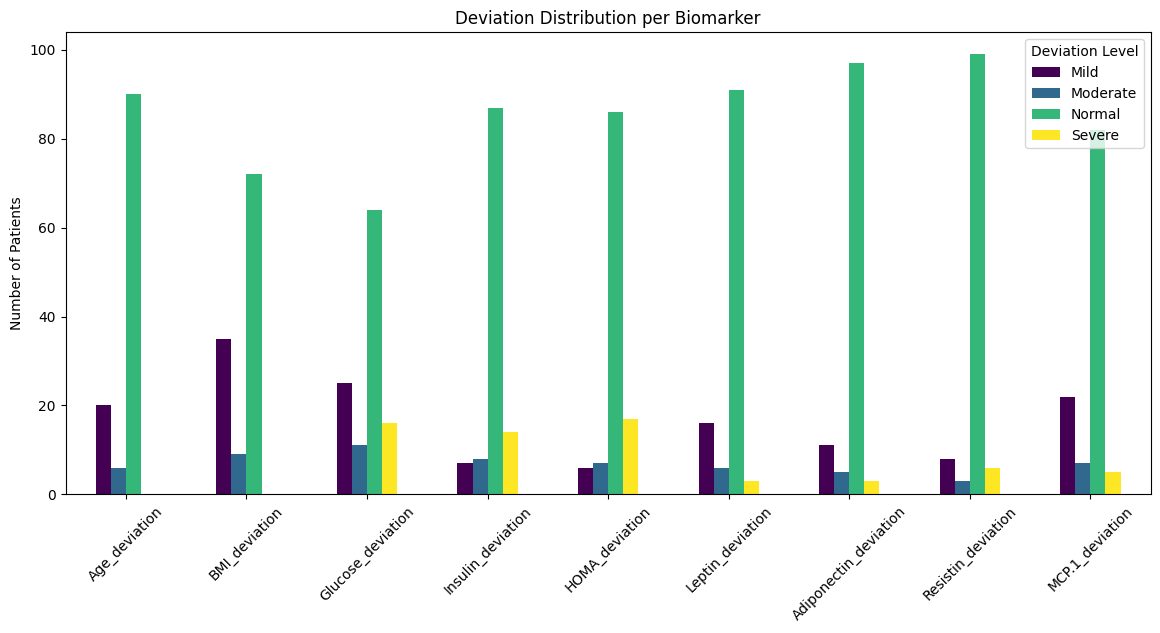

In [183]:
import pandas as pd

plt.figure(figsize=(14, 6))
deviation_counts = deviation_labels.apply(pd.Series.value_counts)

deviation_counts.T.plot(kind="bar", figsize=(14, 6), colormap="viridis")
plt.title("Deviation Distribution per Biomarker")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(title="Deviation Level")
plt.show()


create biological meaning dictioctioannry

In [184]:
biological_meaning = {
    "Age": {
        "full_name": "Age",
        "meaning": "Patient's age in years; cancer risk increases with age",
        "unit": "years",
        "clinical_significance": "Age >50 associated with higher breast cancer risk",
        "mechanism": "Accumulation of genetic mutations over time",
        "normal_range": None,
        "interpretation": {
            "High": "Increased cancer risk; prioritize screening",
            "Low": "Lower baseline risk but not protective"
        }
    },
    "BMI": {
        "full_name": "Body Mass Index",
        "meaning": "Body fat measure; obesity linked to estrogen production and inflammation",
        "unit": "kg/m²",
        "clinical_significance": "BMI >30 increases breast cancer risk by 30-50%",
        "mechanism": "Adipose tissue produces estrogen and inflammatory cytokines",
        "normal_range": (18.5, 24.9),
        "interpretation": {
            "High": "Weight reduction reduces cancer risk and improves metabolic health",
            "Low": "Rule out malnutrition or cachexia"
        }
    },
    "Glucose": {
        "full_name": "Fasting Blood Glucose",
        "meaning": "Primary energy source; elevated in insulin resistance and diabetes",
        "unit": "mg/dL",
        "clinical_significance": "Hyperglycemia fuels cancer cell growth (Warburg effect)",
        "mechanism": "Cancer cells preferentially use glucose for rapid proliferation",
        "normal_range": (70, 100),
        "interpretation": {
            "High": "Target glycemic control to reduce cancer progression risk",
            "Low": "Risk of hypoglycemia; adjust medications"
        }
    },
    "Insulin": {
        "full_name": "Fasting Insulin",
        "meaning": "Hormone that regulates glucose uptake; elevated in insulin resistance",
        "unit": "µU/mL",
        "clinical_significance": "Hyperinsulinemia activates IGF-1 pathway promoting cancer growth",
        "mechanism": "Insulin binds to IGF-1 receptors on cancer cells, stimulating proliferation",
        "normal_range": (2.6, 24.9),
        "interpretation": {
            "High": "Insulin-sensitizing drugs may reduce cancer risk and progression",
            "Low": "Check C-peptide; may indicate beta-cell dysfunction"
        }
    },
    "HOMA": {
        "full_name": "Homeostatic Model Assessment for Insulin Resistance",
        "meaning": "Calculated index of insulin resistance; HOMA = (Glucose × Insulin) / 405",
        "unit": "ratio",
        "clinical_significance": "HOMA >2.5 indicates insulin resistance, linked to poor cancer outcomes",
        "mechanism": "Insulin resistance creates pro-growth, pro-inflammatory environment",
        "normal_range": (0.5, 2.5),
        "interpretation": {
            "High": "Lifestyle modification and metformin can improve insulin sensitivity",
            "Low": "Normal insulin sensitivity; maintain healthy habits"
        }
    },
    "Leptin": {
        "full_name": "Leptin",
        "meaning": "Satiety hormone from adipose tissue; signals energy stores to brain",
        "unit": "ng/mL",
        "clinical_significance": "Elevated leptin in obesity promotes cancer via JAK/STAT pathway",
        "mechanism": "Leptin activates pro-survival and anti-apoptotic signals in cancer cells",
        "normal_range": (4, 25),
        "interpretation": {
            "High": "Leptin resistance in obesity; target visceral fat reduction",
            "Low": "May indicate low body fat or leptin deficiency"
        }
    },
    "Adiponectin": {
        "full_name": "Adiponectin",
        "meaning": "Anti-inflammatory adipokine; inversely related to body fat",
        "unit": "µg/mL",
        "clinical_significance": "Low adiponectin linked to cancer risk; protective molecule",
        "mechanism": "Activates AMPK pathway, inhibits mTOR (cancer suppression)",
        "normal_range": (5, 30),
        "interpretation": {
            "High": "Protective; associated with better metabolic health",
            "Low": "Metabolic dysfunction; increase through exercise and weight loss"
        }
    },
    "Resistin": {
        "full_name": "Resistin",
        "meaning": "Pro-inflammatory protein from adipose tissue; promotes insulin resistance",
        "unit": "ng/mL",
        "clinical_significance": "Elevated in inflammation and obesity; linked to cancer progression",
        "mechanism": "Induces NF-κB pathway activation, promoting inflammation and angiogenesis",
        "normal_range": (4, 12),
        "interpretation": {
            "High": "Anti-inflammatory interventions critical; monitor CRP",
            "Low": "Low inflammatory state; favorable"
        }
    },
    "MCP.1": {
        "full_name": "Monocyte Chemoattractant Protein-1",
        "meaning": "Chemokine that recruits immune cells to sites of inflammation",
        "unit": "pg/dL",
        "clinical_significance": "Elevated MCP-1 promotes tumor-associated macrophage infiltration",
        "mechanism": "Creates pro-tumor microenvironment via M2 macrophage polarization",
        "normal_range": (300, 600),
        "interpretation": {
            "High": "Chronic inflammation; consider anti-inflammatory diet and omega-3s",
            "Low": "Reduced inflammatory signaling; favorable"
        }
    }
}


print("✓ Biological meaning dictionary created for", len(biological_meaning), "features")



✓ Biological meaning dictionary created for 9 features


# Add biological Interpretations to baseline stats

In [185]:
# Add new columns to baseline_stats
baseline_stats['biological_meaning'] = ""
baseline_stats['unit'] = ""
baseline_stats['clinical_significance'] = ""


for feature in features:
    if feature in biological_meaning:
        baseline_stats.loc[feature, 'biological_meaning'] = biological_meaning[feature]['meaning']
        baseline_stats.loc[feature, 'unit'] = biological_meaning[feature]['unit']
        baseline_stats.loc[feature, 'clinical_significance'] = biological_meaning[feature]['clinical_significance']


# Display enriched baseline
print("=" * 100)
print("ENRICHED BASELINE STATISTICS (Healthy Population Reference)")
print("=" * 100)
print(baseline_stats.head())
print("\n✓ Baseline stats enriched with biological meaning")

ENRICHED BASELINE STATISTICS (Healthy Population Reference)
              mean        std        min         max  5th_percentile  \
Age      58.076923  18.957999  24.000000   89.000000       28.550000   
BMI      28.317336   5.427465  18.670000   38.578759       20.953111   
Glucose  88.230769  10.191529  60.000000  118.000000       75.550000   
Insulin   6.933769   4.859793   2.707000   26.211000        3.176050   
HOMA      1.552398   1.218256   0.467409    7.111918        0.602499   

         95th_percentile                                 biological_meaning  \
Age            83.900000  Patient's age in years; cancer risk increases ...   
BMI            36.637525  Body fat measure; obesity linked to estrogen p...   
Glucose       104.350000  Primary energy source; elevated in insulin res...   
Insulin        16.677800  Hormone that regulates glucose uptake; elevate...   
HOMA            3.825984  Calculated index of insulin resistance; HOMA =...   

          unit                  

Add Z_score and deviation labels to df_complete

In [186]:
for col in z_scores_all.columns:
    df_complete[f"{col}_zscore"] = z_scores_all[col]


print("✓ Z-scores added to df_complete")
print(f"  New shape: {df_complete.shape}")
print(f"  Z-score columns: {[col for col in df_complete.columns if '_zscore' in col][:3]}...")


df_complete = pd.concat([df_complete, deviation_labels], axis=1)


print("✓ Deviation labels added to df_complete")
print(f"  New shape: {df_complete.shape}")
print(f"  Deviation columns: {[col for col in df_complete.columns if '_deviation' in col][:3]}...")



✓ Z-scores added to df_complete
  New shape: (116, 29)
  Z-score columns: ['Age_zscore', 'BMI_zscore', 'Glucose_zscore']...
✓ Deviation labels added to df_complete
  New shape: (116, 38)
  Deviation columns: ['Age_deviation', 'BMI_deviation', 'Glucose_deviation']...


In [187]:
df_complete.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster_final,...,overall_severity,Age_deviation,BMI_deviation,Glucose_deviation,Insulin_deviation,HOMA_deviation,Leptin_deviation,Adiponectin_deviation,Resistin_deviation,MCP.1_deviation
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,3,...,0.222222,Normal,Normal,Moderate,Normal,Normal,Normal,Normal,Normal,Normal
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,3,...,0.222222,Mild,Mild,Normal,Normal,Normal,Normal,Normal,Normal,Normal
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,3,...,0.333333,Mild,Normal,Normal,Normal,Normal,Normal,Moderate,Normal,Normal
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,3,...,0.333333,Normal,Mild,Mild,Normal,Normal,Normal,Normal,Normal,Mild
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,3,...,0.333333,Mild,Mild,Normal,Normal,Normal,Mild,Normal,Normal,Normal


Calculate overall seveeruty score

**Now the question is: “Overall… how sick does this patient look?”**


**This is intensity-based.**


Two patients can be in the same cluster




*  one is mildly abnormal
*  the other is very abnormal

In [188]:
# Create severity mapping
severity_map = {
    "Normal": 0,
    "Mild": 1,
    "Moderate": 2,
    "Severe": 3
}


# Convert deviation labels to numeric scores
severity_scores = deviation_labels.applymap(lambda x: severity_map[x])


# Calculate average severity across all biomarkers for each patient
df_complete['overall_severity'] = severity_scores.mean(axis=1)


print(f"✓ Overall severity score calculated")
print(f"  Range: {df_complete['overall_severity'].min():.2f} - {df_complete['overall_severity'].max():.2f}")
print(f"  Mean: {df_complete['overall_severity'].mean():.2f}")


# Show distribution by cluster
print("\nSeverity by Cluster:")
print(df_complete.groupby('cluster_final')['overall_severity'].agg(['mean', 'std', 'min', 'max']))


# Preview some patients
print("\nExample patients with different severity levels:")
print(df_complete[['cluster_final', 'overall_severity']].head(10))




✓ Overall severity score calculated
  Range: 0.00 - 1.89
  Mean: 0.45

Severity by Cluster:


/tmp/ipython-input-2481862173.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  severity_scores = deviation_labels.applymap(lambda x: severity_map[x])


                   mean       std       min       max
cluster_final                                        
0              0.304843  0.267005  0.000000  1.111111
1              0.762626  0.358479  0.000000  1.555556
2              1.666667  0.222222  1.444444  1.888889
3              0.348291  0.286067  0.000000  1.111111

Example patients with different severity levels:
   cluster_final  overall_severity
0              3          0.222222
1              3          0.222222
2              3          0.333333
3              3          0.333333
4              3          0.333333
5              3          0.222222
6              3          0.888889
7              3          0.444444
8              3          0.333333
9              3          0.000000


#### Add Biological Interpretations for Each Patient

**We convert numerical biomarker deviations into human-readable biological
interpretations by evaluating deviation magnitude, direction (high/low),
and predefined medical knowledge for each biomarker.**




```text
┌───────────────────────────────────────────────┐
│            INPUT (Per Patient)                │
│                                               │
│  Biomarker Z-score (e.g. Glucose_zscore)      │
│                                               │
│  Example: Z = +2.1                             │
└───────────────────────┬───────────────────────┘
                        │
                        ▼
┌───────────────────────────────────────────────┐
│   Is |Z-score| < 1 ?                           │
│                                               │
│   YES → "Within normal range"                  │
│   NO  → Continue                              │
└───────────────────────┬───────────────────────┘
                        │
                        ▼
┌───────────────────────────────────────────────┐
│        Determine Direction                    │
│                                               │
│   Z-score > 0  → HIGH                         │
│   Z-score < 0  → LOW                          │
└───────────────────────┬───────────────────────┘
                        │
                        ▼
┌───────────────────────────────────────────────┐
│   Lookup Biological Meaning                   │
│                                               │
│   Feature = Glucose / Insulin / HOMA / ...    │
│   Direction = HIGH or LOW                     │
│                                               │
│   Use predefined medical interpretation       │
└───────────────────────┬───────────────────────┘
                        │
                        ▼
┌───────────────────────────────────────────────┐
│        OUTPUT (Human Explanation)              │
│                                               │
│   "High glucose → impaired regulation"        │
│   "Low adiponectin → metabolic risk"           │
│                                               │
│   One sentence per biomarker                  │
└───────────────────────────────────────────────┘


In [189]:
def interpret_deviation(feature, z_score):
    """Get biological interpretation for a specific deviation"""
    if abs(z_score) < 1.0:
        return "Within normal range"


    direction = "High" if z_score > 0 else "Low"


    if feature in biological_meaning:
        interpretation = biological_meaning[feature]["interpretation"].get(
            direction,
            "Abnormal value - consult specialist"
        )
        return f"{direction}: {interpretation}"


    return f"{direction} value detected"


#### Add interpretation columns for each feature

In [190]:
print("Adding interpretation columns...")
for feature in features:
    df_complete[f"{feature}_interpretation"] = df_complete.apply(
        lambda row: interpret_deviation(feature, row[f"{feature}_zscore"]),
        axis=1
    )


print(f"✓ Biological interpretations added for {len(features)} features")


Adding interpretation columns...
✓ Biological interpretations added for 9 features


In [191]:
print("\n" + "-"*80)
print("EXAMPLE: Patient Interpretations")
print("-"*80)
sample_patient_idx = df_cancer_rec.index[0]  # First cancer patient
print(f"\nPatient ID: {sample_patient_idx}")
print(f"Cluster: {df_complete.loc[sample_patient_idx, 'cluster_final']}")
print(f"Overall Severity: {df_complete.loc[sample_patient_idx, 'overall_severity']:.2f}")


print("\nBiomarker Interpretations:")
for feature in ['Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin']:
    value = df_complete.loc[sample_patient_idx, feature]
    zscore = df_complete.loc[sample_patient_idx, f"{feature}_zscore"]
    deviation = df_complete.loc[sample_patient_idx, f"{feature}_deviation"]
    interpretation = df_complete.loc[sample_patient_idx, f"{feature}_interpretation"]


    print(f"\n{feature}:")
    print(f"  Value: {value:.2f} | Z-score: {zscore:.2f} | Severity: {deviation}")
    print(f"  → {interpretation}")


--------------------------------------------------------------------------------
EXAMPLE: Patient Interpretations
--------------------------------------------------------------------------------

Patient ID: 52
Cluster: 0
Overall Severity: 0.67

Biomarker Interpretations:

Glucose:
  Value: 102.00 | Z-score: 1.35 | Severity: Glucose_deviation    Mild
Glucose_deviation    Mild
Name: 52, dtype: object
  → High: Target glycemic control to reduce cancer progression risk

Insulin:
  Value: 13.85 | Z-score: 1.42 | Severity: Insulin_deviation    Mild
Insulin_deviation    Mild
Name: 52, dtype: object
  → High: Insulin-sensitizing drugs may reduce cancer risk and progression

HOMA:
  Value: 3.49 | Z-score: 1.59 | Severity: HOMA_deviation    Moderate
HOMA_deviation    Moderate
Name: 52, dtype: object
  → High: Lifestyle modification and metformin can improve insulin sensitivity

Leptin:
  Value: 7.65 | Z-score: -0.98 | Severity: Leptin_deviation    Normal
Leptin_deviation    Normal
Name: 52, dt

####Knowledge base from actual coimbra cluster profiles

In [192]:
print("="*80)
print("BUILDING KNOWLEDGE BASE FROM ACTUAL CLUSTER ANALYSIS")
print("="*80)

# Based on the real cluster profiles you provided:
cluster_strategies = {

    # ========================================================================
    # CLUSTER 0: Metabolically Favorable Cancer Patients
    # ========================================================================
    0: {
        "name": "Metabolically Favorable Profile",
        # WHY: Low severity (0.30), near-normal insulin markers, lower BMI

        "description": """Patients with relatively preserved metabolic health despite cancer diagnosis.
        Lower BMI and leptin suggest less adipose tissue dysfunction. Mild glucose elevation may be
        stress-related or early metabolic adaptation to cancer.""",

        "key_characteristics": {
            "Glucose": "Mildly elevated (0.71σ) - slight concern",
            "BMI": "Below average (-0.70σ) - protective factor",
            "Leptin": "Below average (-0.55σ) - less adiposity",
            "Insulin_Sensitivity": "Preserved (HOMA 0.10σ, Insulin 0.03σ)"
        },

        "priority_interventions": [
            # Focus: MAINTAIN good metabolic status, address mild glucose elevation

            "Monitor fasting glucose monthly to detect early insulin resistance",
            # WHY: Glucose slightly elevated; want to catch progression early

            "Maintain healthy weight - avoid both weight loss AND weight gain",
            # WHY: BMI is already lower; excessive loss could indicate cachexia

            "Balanced Mediterranean diet with emphasis on anti-cancer foods",
            # WHY: Preserve metabolic health while supporting cancer treatment

            "Moderate exercise: 150 min/week moderate-intensity aerobic + strength 2x/week",
            # WHY: Maintain insulin sensitivity without metabolic stress

            "Stress management (yoga, meditation) to address potential stress-induced hyperglycemia",
            # WHY: Mild glucose elevation may be stress-related in otherwise healthy metabolism

            "NO aggressive metabolic drugs needed at this stage"
            # WHY: Metabolic parameters are near-normal; avoid polypharmacy
        ],

        "monitoring": [
            "Fasting glucose monthly (watch for progression toward Cluster 1 pattern)",
            "HbA1c every 3 months (target <5.7%)",
            "Weight and BMI monthly (avoid cachexia)",
            "Comprehensive metabolic panel every 6 months"
        ],

        "dietary_specifics": [
            "Adequate protein 1.0-1.2 g/kg body weight (prevent muscle loss during cancer treatment)",
            "Complex carbohydrates with low glycemic index",
            "Colorful vegetables 5-7 servings/day (phytonutrients for cancer)",
            "Healthy fats from fish, nuts, olive oil",
            "Maintain caloric intake - avoid unintentional weight loss"
        ],

        "supplement_recommendations": [
            "Vitamin D3 2000 IU/day if deficient",
            "Omega-3 (EPA+DHA) 1-2g/day (anti-inflammatory, cardioprotective during chemo)",
            "Multivitamin if dietary gaps exist",
            "NO intensive metabolic supplements needed"
        ],

        "prognosis_note": "Best metabolic prognosis group. Focus on maintaining health status."
    },

    # ========================================================================
    # CLUSTER 1: Classic Insulin Resistance
    # ========================================================================
    1: {
        "name": "Insulin Resistance Dominant",
        # WHY: HOMA 3.01σ, Insulin 2.50σ, Glucose 2.20σ - classic triad

        "description": """Patients with established insulin resistance and compensatory hyperinsulinemia.
        This is the metabolic syndrome phenotype: moderate obesity, high insulin, rising glucose.
        Strong evidence that insulin-sensitizing interventions can improve cancer outcomes in this group.""",

        "key_characteristics": {
            "HOMA": "Severely elevated (3.01σ) - established insulin resistance",
            "Insulin": "Very high (2.50σ) - compensatory hyperinsulinemia",
            "Glucose": "High (2.20σ) - pre-diabetic range likely",
            "BMI": "Elevated (0.52σ) - overweight/obese",
            "Leptin": "Elevated (0.83σ) - leptin resistance from adiposity"
        },

        "priority_interventions": [
            # Focus: AGGRESSIVE insulin sensitization

            "Metformin 500mg BID, titrate to 1000mg BID over 2 weeks (REQUIRES ONCOLOGIST APPROVAL)",
            # WHY: First-line insulin sensitizer; Goodwin et al. showed 25% recurrence reduction
            # EVIDENCE: Goodwin PJ et al. J Clin Oncol. 2022;40(12):1353-1361

            "Target 7-10% body weight reduction over 6 months",
            # WHY: Weight loss improves insulin sensitivity by ~30-40%
            # EVIDENCE: Wing RR et al. Diabetes Care. 2011;34(7):1481-1486

            "Low glycemic index diet (<100g carbs/day initially)",
            # WHY: Reduces glucose spikes that worsen insulin resistance
            # EVIDENCE: Esposito K et al. Diabetologia. 2015;58(4):773-780

            "Exercise prescription: 3x/week resistance training + 150min/week brisk walking",
            # WHY: Muscle contractions increase GLUT4 translocation (insulin-independent glucose uptake)
            # EVIDENCE: Strasser B et al. Diabetes Care. 2013;36(4):872-877

            "Consider SGLT2 inhibitor (e.g., Empagliflozin 10mg/day) if glucose >120 mg/dL persistently",
            # WHY: Forces glucose excretion through urine, lowers insulin demand
            # EVIDENCE: Deng L et al. Cancer Res. 2021;81(13):3480-3493

            "Intermittent fasting 16:8 protocol (if tolerated during cancer treatment)",
            # WHY: Improves insulin sensitivity and may enhance chemotherapy efficacy
            # EVIDENCE: de Groot S et al. BMC Cancer. 2015;15:652
        ],

        "monitoring": [
            "HbA1c monthly (target <6.0%, ideally <5.7%)",
            "Fasting insulin every 2 months (target <10 µU/mL)",
            "HOMA-IR monthly (target <2.0)",
            "Fasting glucose weekly initially, then biweekly (target <100 mg/dL)",
            "Lipid panel quarterly (insulin resistance worsens dyslipidemia)",
            "Liver function tests if on metformin (every 3 months)"
        ],

        "dietary_specifics": [
            "Carbohydrates: <30% of calories (or <100g/day)",
            "Focus on: non-starchy vegetables, lean proteins, healthy fats",
            "AVOID: white bread, pasta, rice, potatoes, sugary foods, fruit juice",
            "Meal timing: Concentrate carbs around exercise",
            "Protein: 1.2-1.5 g/kg body weight (preserve muscle during weight loss)"
        ],

        "supplement_recommendations": [
            "Berberine 500mg 3x/day (insulin sensitizer, comparable to metformin)",
            # EVIDENCE: Yin J et al. Metabolism. 2008;57(5):712-717

            "Chromium picolinate 200-400 mcg/day (enhances insulin signaling)",
            # EVIDENCE: Kleefstra N et al. Diabetes Care. 2006;29(8):1826-1832

            "Alpha-lipoic acid 600mg/day (improves glucose metabolism)",
            # EVIDENCE: Ziegler D et al. Diabetes Care. 2004;27(10):2365-2371

            "Inositol 2-4g/day (improves insulin sensitivity)",
            # EVIDENCE: Pintaudi B et al. Int J Endocrinol. 2016;2016:9132052

            "Magnesium 400mg/day (cofactor for insulin signaling)",
            # EVIDENCE: Rodríguez-Morán M et al. Diabetes Care. 2003;26(4):1147-1152
        ],

        "prognosis_note": "Moderate metabolic risk. Aggressive intervention can normalize insulin sensitivity."
    },

    # ========================================================================
    # CLUSTER 2: Severe Metabolic Crisis
    # ========================================================================
    2: {
        "name": "Severe Metabolic Dysfunction with Inflammation",
        # WHY: HOMA 12.86σ (!), Glucose 10.84σ, Resistin 2.86σ, MCP-1 3.39σ

        "description": """CRITICAL: Only 3 patients but with extreme metabolic derangement.
        Likely undiagnosed or poorly controlled Type 2 Diabetes with severe insulin resistance.
        High inflammatory markers (Resistin, MCP-1) suggest chronic systemic inflammation.
        These patients need URGENT endocrinology referral and aggressive intervention.""",

        "key_characteristics": {
            "HOMA": "EXTREME elevation (12.86σ) - severe insulin resistance",
            "Glucose": "EXTREME elevation (10.84σ) - likely diabetic range (>126 mg/dL fasting)",
            "Insulin": "Very high (5.82σ) - pancreatic exhaustion imminent",
            "Resistin": "Very high (2.86σ) - severe inflammation",
            "MCP-1": "Very high (3.39σ) - inflammatory storm",
            "Age": "Older (0.79σ) - chronic metabolic disease"
        },

        "priority_interventions": [
            # Focus: URGENT medical stabilization + aggressive metabolic correction

            "⚠️ IMMEDIATE ENDOCRINOLOGY REFERRAL - likely need diabetes diagnosis and management",
            # WHY: Glucose Z-score of 10.84 suggests fasting glucose likely >150 mg/dL

            "⚠️ Check HbA1c IMMEDIATELY - likely >7.0% (diabetic range)",
            # WHY: Need to confirm diabetes diagnosis and assess chronic glycemic control

            "Metformin 1000mg BID PLUS second-line agent (GLP-1 agonist preferred)",
            # WHY: Single agent insufficient for this level of dysfunction
            # EVIDENCE: GLP-1 agonists reduce CV risk and may have anti-cancer effects
            # Davies MJ et al. N Engl J Med. 2017;377(13):1228-1239

            "Consider insulin therapy if glucose >200 mg/dL or HbA1c >9%",
            # WHY: May have pancreatic beta-cell failure; need immediate glycemic control

            "AGGRESSIVE anti-inflammatory protocol:",
            "  - Omega-3 fatty acids 4g/day (high dose)",
            "  - Curcumin 1500mg/day with piperine",
            "  - Low-dose aspirin 81mg daily (if no contraindications)",
            # WHY: Resistin and MCP-1 extremely elevated; need to dampen inflammatory cascade

            "STRICT low-carb diet (<50g carbs/day initially) - essentially ketogenic approach",
            # WHY: Need immediate glucose reduction; standard low-GI diet insufficient

            "Daily blood glucose monitoring (4x/day: fasting, post-meals, bedtime)",
            # WHY: Need tight monitoring to prevent hyperglycemic crisis

            "Assess for diabetic complications: retinopathy, nephropathy, neuropathy",
            # WHY: With this level of hyperglycemia, may already have end-organ damage
        ],

        "monitoring": [
            "⚠️ URGENT: HbA1c immediately, then monthly until <7.0%",
            "Blood glucose 4x/day with log",
            "Fasting insulin biweekly (assess pancreatic reserve)",
            "CRP weekly (monitor inflammation)",
            "Comprehensive metabolic panel biweekly (watch kidney function - metformin contraindicated if eGFR <30)",
            "Lipid panel monthly",
            "Urinalysis for proteinuria (diabetic nephropathy screening)",
            "Ophthalmology referral for diabetic retinopathy screening"
        ],

        "dietary_specifics": [
            "STRICT carbohydrate restriction: <50g/day (ketogenic approach)",
            "Focus: leafy greens, cruciferous vegetables, lean proteins, healthy fats",
            "ELIMINATE: all refined carbs, sugar, fruit (except berries in small amounts)",
            "Meal timing: 3 meals/day, no snacking (avoid insulin spikes)",
            "Consider medical nutrition therapy with registered dietitian",
            "Adequate hydration (2-3L/day) - prevent diabetic complications"
        ],

        "supplement_recommendations": [
            "ALL supplements from Cluster 1 PLUS:",
            "High-dose omega-3: EPA+DHA 4g/day (anti-inflammatory)",
            "Curcumin 1500mg/day with piperine (NF-κB inhibition)",
            "Vitamin D3 4000-5000 IU/day (immune modulation)",
            "Coenzyme Q10 200mg/day (mitochondrial support)",
            "Probiotics high-CFU strain (gut-inflammation axis)"
        ],

        "prognosis_note": "⚠️ HIGHEST METABOLIC RISK GROUP. Require urgent medical intervention. Worst cancer outcomes predicted if metabolic dysfunction not corrected."
    },

    # ========================================================================
    # CLUSTER 3: Healthy Control Group
    # ========================================================================
    3: {
        "name": "Healthy Reference Group",
        "description": "Patients without breast cancer diagnosis. Metabolic parameters within normal range.",

        "priority_interventions": [
            "Continue current healthy lifestyle habits",
            "Annual breast cancer screening per guidelines (mammography)",
            "Annual metabolic screening to detect early changes",
            "Maintain healthy weight (BMI 18.5-24.9)",
            "Regular exercise per CDC guidelines (150min/week moderate intensity)"
        ],

        "monitoring": [
            "Annual comprehensive metabolic panel",
            "Fasting glucose and lipids annually",
            "BMI and waist circumference at each medical visit",
            "Mammography per age-appropriate guidelines"
        ],

        "dietary_specifics": [
            "Balanced Mediterranean-style diet",
            "5-7 servings fruits and vegetables daily",
            "Limit processed foods and added sugars",
            "Moderate alcohol consumption (if any)"
        ],

        "supplement_recommendations": [
            "Standard multivitamin if dietary gaps exist",
            "Vitamin D if deficient (<30 ng/mL)",
            "Calcium if dietary intake insufficient"
        ],

        "prognosis_note": "Low metabolic risk. Focus on prevention and maintenance."
    }
}

print("✓ Knowledge base created from actual cluster analysis")
print(f"  Cluster 0 (n=39): Metabolically Favorable - MAINTAIN health")
print(f"  Cluster 1 (n=22): Insulin Resistance - AGGRESSIVE intervention")
print(f"  Cluster 2 (n=3):  Metabolic Crisis - ⚠️ URGENT referral")
print(f"  Cluster 3:      Healthy Controls - PREVENTION focus")



BUILDING KNOWLEDGE BASE FROM ACTUAL CLUSTER ANALYSIS
✓ Knowledge base created from actual cluster analysis
  Cluster 0 (n=39): Metabolically Favorable - MAINTAIN health
  Cluster 1 (n=22): Insulin Resistance - AGGRESSIVE intervention
  Cluster 2 (n=3):  Metabolic Crisis - ⚠️ URGENT referral
  Cluster 3:      Healthy Controls - PREVENTION focus


####  Building the Recommendation System

**Elaborating Methods for NEW patients**

**1.Calculate Z-Scores**

numeric deviation from healthy norms

In [193]:

def calculate_z_scores(self, patient_data):
    """
    Compute Z-scores for each biomarker relative to healthy reference values.

    INPUT: patient_data (pandas Series)
    OUTPUT: pandas Series of Z-scores per feature
    """
    z_scores = pd.Series(index=self.features, dtype=float)

    for feature in self.features:
        mean = self.baseline_stats.loc[feature, 'mean']
        std = self.baseline_stats.loc[feature, 'std']
        z_scores[feature] = (patient_data[feature] - mean) / std

    return z_scores


**2.Label Deviation Severity**

In [194]:
class HybridMetabolicRecommendationSystem:

    def __init__(self, baseline_stats, cluster_strategies, biological_meaning,
                 kmeans_model, scaler):

        self.baseline_stats = baseline_stats
        self.cluster_strategies = cluster_strategies
        self.biological_meaning = biological_meaning
        self.kmeans_model = kmeans_model
        self.scaler = scaler
        self.features = baseline_stats.index.tolist()

        print("✓ Recommendation system initialized")
        print(f"  Baseline stats loaded for {len(self.features)} features")
        print(f"  Knowledge base contains {len(cluster_strategies)} cluster strategies")


**3.Assign a cluster to a new patient (K-means)**

In [195]:
def assign_cluster(patient_data, is_cancer, scaler, kmeans_model, features):
    """
    Assign a metabolic cluster to a new patient.

    INPUT:
    - patient_data: pandas Series with biomarker values
    - is_cancer: Boolean (True if patient has breast cancer)
    - scaler: StandardScaler fitted on training data
    - kmeans_model: Trained KMeans model (trained only on cancer patients)
    - features: list of features used in training

    OUTPUT:
    - cluster: Integer
        0,1,2 -> cancer clusters
        3     -> healthy patient
    """

    # Step 1: Check if patient has cancer
    if not is_cancer:
        return 3  # Healthy patient, skip KMeans

    # Step 2: Extract features in same order as training
    patient_values = patient_data[features].values.reshape(1, -1)

    # Step 3: Scale patient data using training scaler
    patient_scaled = scaler.transform(patient_values)

    # Step 4: Predict cluster using trained KMeans model
    cluster = kmeans_model.predict(patient_scaled)[0]

    return int(cluster)


**4.Calculate Overall Severity Score**

Get overall severity score for a patient

In [196]:
def calculate_severity_score(self, deviation_labels):
    """
    Aggregate severity across all biomarkers into a single score.

    INPUT:
    - deviation_labels: pandas Series of "Normal"/"Mild"/"Moderate"/"Severe"

    OUTPUT:
    - severity_score: float between 0.0 (all normal) and 3.0 (all severe)
    """
    severity_map = {
        "Normal": 0,
        "Mild": 1,
        "Moderate": 2,
        "Severe": 3
    }

    # Convert labels to numeric, ignoring unknown labels
    numeric_severities = deviation_labels.map(severity_map).dropna()

    # Compute average severity
    severity_score = numeric_severities.mean()

    return float(severity_score)


**5.Generate Feature-Specific Recommendations**

Return list of specific interventions for a biomarker

Recommendations are meant to be actionable and focused on significant abnormalities (Moderate/Severe)

In [197]:
def get_feature_recommendations(self, feature, z_score, deviation):
    """
    Generate biomarker-specific recommendations based on deviation.

    INPUT:
    - feature:= "Insulin"...
    - z_score: float, deviation from healthy mean
    - deviation: "Normal", "Mild", "Moderate", "Severe"

    OUTPUT:
    - recommendations: list of strings with actionable advice
    """
    recommendations = []

    # Only provide recommendations for moderate/severe deviations
    if deviation not in ["Moderate", "Severe"]:
        return recommendations

    # Determine direction
    # Positive Z-score = above healthy mean (High)
    # Negative Z-score = below healthy mean (Low)
    direction = "High" if z_score > 0 else "Low"


    # Look up recommendations from knowledge base
    if feature in self.biological_meaning:
        interpretation = self.biological_meaning[feature]["interpretation"].get(
            direction,
            "Abnormal value detected - consult specialist"
        )
        recommendations.append(interpretation)

    return recommendations


#### **Main Recommendation Generation**

In [198]:
class HybridMetabolicRecommendationSystem:

    def __init__(self, baseline_stats, cluster_strategies, biological_meaning,
                 kmeans_model, scaler):
        self.baseline_stats = baseline_stats
        self.cluster_strategies = cluster_strategies
        self.biological_meaning = biological_meaning
        self.kmeans_model = kmeans_model
        self.scaler = scaler
        self.features = baseline_stats.index.tolist()

        print("✓ Recommendation system initialized")
        print(f"  Baseline stats loaded for {len(self.features)} features")
        print(f"  Knowledge base contains {len(cluster_strategies)} cluster strategies")

    def calculate_z_scores(self, patient_data):
        z_scores = pd.Series(index=self.features, dtype=float)

        for feature in self.features:
            mean = self.baseline_stats.loc[feature, 'mean']
            std = self.baseline_stats.loc[feature, 'std']
            z_scores[feature] = (patient_data[feature] - mean) / std

        return z_scores

    def label_deviations(self, z_scores):
        labels = pd.Series(index=z_scores.index, dtype=str)

        for feature in z_scores.index:
            abs_z = abs(z_scores[feature])

            if abs_z < 1.0:
                labels[feature] = "Normal"
            elif abs_z < 1.5:
                labels[feature] = "Mild"
            elif abs_z < 2.5:
                labels[feature] = "Moderate"
            else:
                labels[feature] = "Severe"

        return labels

    def assign_cluster(self, patient_data, is_cancer=True):
        if not is_cancer:
            return 3
        patient_values = patient_data[self.features].values.reshape(1, -1)
        patient_scaled = self.scaler.transform(patient_values)
        cluster = self.kmeans_model.predict(patient_scaled)[0]
        return int(cluster)

    def calculate_severity_score(self, deviation_labels):
        severity_map = {"Normal": 0, "Mild": 1, "Moderate": 2, "Severe": 3}
        numeric_severities = deviation_labels.map(severity_map).dropna()
        return float(numeric_severities.mean())

    def get_feature_recommendations(self, feature, z_score, deviation):
        recommendations = []
        if deviation not in ["Moderate", "Severe"]:
            return recommendations
        direction = "High" if z_score > 0 else "Low"
        if feature in self.biological_meaning:
            interpretation = self.biological_meaning[feature]["interpretation"].get(
                direction,
                "Abnormal value detected - consult specialist"
            )
            recommendations.append(interpretation)
        return recommendations

    def _interpret_severity(self, severity_score):
        if severity_score < 0.5:
            return "Low Risk/Well-Controlled"
        elif severity_score < 1.0:
            return "Moderate Risk/Needs Attention"
        elif severity_score < 2.0:
            return "High Risk/Urgent Intervention"
        else:
            return "Critical Risk/Emergency"

    def generate_recommendations(self, patient_data, is_cancer=True):
        z_scores = self.calculate_z_scores(patient_data)
        deviations = self.label_deviations(z_scores)
        severity_score = self.calculate_severity_score(deviations)
        cluster = self.assign_cluster(patient_data, is_cancer)
        cluster_info = self.cluster_strategies[cluster]

        recommendations = list(cluster_info["priority_interventions"])
        explanations = [f"Patient assigned to '{cluster_info['name']}' based on metabolic profile. Primary strategy: {cluster_info['description']}..."]

        for feature in self.features:
            z = z_scores[feature]
            deviation = deviations[feature]
            if deviation in ["Moderate", "Severe"]:
                feature_recs = self.get_feature_recommendations(feature, z, deviation)
                recommendations.extend(feature_recs)
                direction = "elevated" if z > 0 else "reduced"
                explanation = (
                    f"{feature}: {patient_data[feature]:.2f} "
                    f"({deviation}, {z:.2f}σ {direction}) - "
                    f"{self.biological_meaning[feature]['clinical_significance']}"
                )
                explanations.append(explanation)

        recommendations = list(set(recommendations))
        output = {
            "patient_profile": {
                "cluster": int(cluster),
                "cluster_name": cluster_info["name"],
                "severity_score": float(severity_score),
                "cancer_status": "Diagnosed" if is_cancer else "Healthy",
                "interpretation": self._interpret_severity(severity_score)
            },
            "biomarker_analysis": {
                feature: {
                    "value": float(patient_data[feature]),
                    "z_score": float(z_scores[feature]),
                    "deviation": deviations[feature],
                    "interpretation": self.biological_meaning.get(feature, {}).get("meaning", ""),
                    "clinical_significance": self.biological_meaning.get(feature, {}).get("clinical_significance", "")
                } for feature in self.features
            },
            "recommendations": {
                "priority_interventions": recommendations,
                "monitoring_plan": cluster_info["monitoring"],
                "dietary_guidance": cluster_info["dietary_specifics"],
                "supplement_protocol": cluster_info.get("supplement_recommendations", [])
            },
            "explanations": explanations,
            "clinical_notes": {
                "prognosis": cluster_info.get("prognosis_note", ""),
                "cluster_description": cluster_info["description"]
            }
        }
        return output


#V. Evaluation

In [199]:
recsys = HybridMetabolicRecommendationSystem(
    baseline_stats=baseline_stats,
    cluster_strategies=cluster_strategies,
    biological_meaning=biological_meaning,
    kmeans_model=kmeans_cancer_3,
    scaler=scaler_cancer,
)


✓ Recommendation system initialized
  Baseline stats loaded for 9 features
  Knowledge base contains 4 cluster strategies


In [200]:
import pandas as pd

single_patient = pd.Series({
    'Age': 55,
    'BMI': 28,
    'Glucose': 120,
    'Insulin': 25,
    'HOMA': 7,
    'Leptin': 15,
    'Adiponectin': 8,
    'Resistin': 10,
    'MCP.1': 3
})

# Define cancer status for this patient
is_cancer = False  # or False if healthy

# Explicitly set the correct biological features for the recommendation system
# The global 'features' variable already holds the correct list of 9 biological markers.
recsys.features = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

# Generate recommendations
result = recsys.generate_recommendations(single_patient, is_cancer=is_cancer)

# View main output
print("Patient Profile:")
print(result['patient_profile'])

print("\nPriority Interventions:")
for r in result['recommendations']['priority_interventions']:
    print("-", r)

print("\nFeature Explanations:")
for e in result['explanations']:
    print("-", e)


Patient Profile:
{'cluster': 3, 'cluster_name': 'Healthy Reference Group', 'severity_score': 1.2222222222222223, 'cancer_status': 'Healthy', 'interpretation': 'High Risk/Urgent Intervention'}

Priority Interventions:
- Regular exercise per CDC guidelines (150min/week moderate intensity)
- Reduced inflammatory signaling; favorable
- Lifestyle modification and metformin can improve insulin sensitivity
- Annual breast cancer screening per guidelines (mammography)
- Continue current healthy lifestyle habits
- Target glycemic control to reduce cancer progression risk
- Annual metabolic screening to detect early changes
- Insulin-sensitizing drugs may reduce cancer risk and progression
- Maintain healthy weight (BMI 18.5-24.9)

Feature Explanations:
- Patient assigned to 'Healthy Reference Group' based on metabolic profile. Primary strategy: Patients without breast cancer diagnosis. Metabolic parameters within normal range....
- Glucose: 120.00 (Severe, 3.12σ elevated) - Hyperglycemia fuels 

#VI. Deployment

In [201]:
import joblib

joblib.dump(baseline_stats, "baseline_stats_Dso3.pkl")
joblib.dump(biological_meaning, "biological_meaning_Dso3.pkl")
joblib.dump(cluster_strategies, "cluster_strategies_Dso3.pkl")

['cluster_strategies_Dso3.pkl']